        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Introduction to Network Analysis</h1>

Material for this session of the course is adopted from [Vincent Traag's Github Page](https://github.com/vtraag/4TU-CSS) with some minor changes.

## 1.Getting started

The package we will use for our network analysis is <b>networkx</b>. There are also other packages out there for Python, such as <u>igraph</u> or <u>graphtool</u>, but will not use them during this course. First, we will load all required packages.

In [1]:
!pip install networkx

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Note:</b> We can create a <u>undirected graph</u> using <b style='color:blue'>Graph( )</b>.

In [2]:
G = nx.Graph()

<b>Note:</b> We can use <b style='color:blue'>add_node( )</b> to add one edge at a time to an existing graph.

In [3]:
G.add_node('N1')
G.add_node('N2')
G.add_node('N3')

G.add_node('N4')
print(nx.info(G))

Graph with 4 nodes and 0 edges


/var/folders/c1/l245nbgx5g96h5n3bn2wfvm1h6c8hp/T/ipykernel_69462/1793641641.py:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


<b>Note:</b> We can use <b style='color:blue'>add_edge( )</b> to add one node to an existing graph.

In [4]:
G.add_edge('N1','N2')
G.add_edge('N1','N3')
G.add_edge('N3','N2')
G.add_edge('N4','N1')
print(nx.info(G))

Graph with 4 nodes and 4 edges


/var/folders/c1/l245nbgx5g96h5n3bn2wfvm1h6c8hp/T/ipykernel_69462/4253376772.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


<b>Note:</b> We can create a <u>directed graph</u> using <b style='color:blue'>DiGraph( )</b>.

In [5]:
G_directed = nx.DiGraph()
G_directed.add_node('N5')
G_directed.add_node('N6')
G_directed.add_node('N7')
G_directed.add_node('N8')
G_directed.add_edge('N5','N6')
G_directed.add_edge('N5','N7')
G_directed.add_edge('N7','N6')
G_directed.add_edge('N8','N5')
print(nx.info(G_directed))

DiGraph with 4 nodes and 4 edges


/var/folders/c1/l245nbgx5g96h5n3bn2wfvm1h6c8hp/T/ipykernel_69462/1949931408.py:10: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G_directed))


<b>Question:</b> What is the main difference between these two graphs?

<b>Note:</b> You can check a graph using <b style='color:blue'>is_directed( )</b> function.

In [6]:
nx.is_directed(G)

False

In [7]:
nx.is_directed(G_directed)

True

<b>Note:</b> You can plot your graph using <b style='color:blue'>draw( )</b> function.

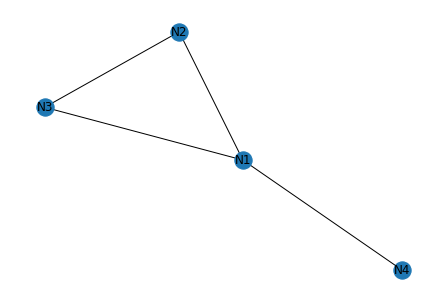

In [8]:
nx.draw(G, with_labels=True)

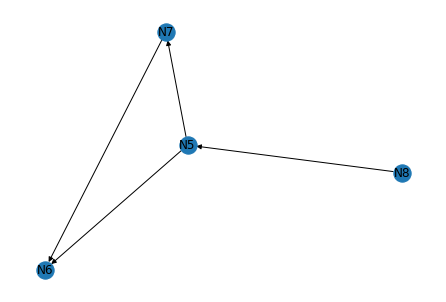

In [9]:
nx.draw(G_directed, with_labels=True)

<b>Note:</b> The information on the number of nodes and edges can also be obtained using functions <b  style='color:blue'>number_of_nodes( )</b> and <b  style='color:blue'>number_of_edges( )</b>.

In [10]:
n = G.number_of_nodes()
e = G.number_of_edges()
print('{0} nodes, {1} edges'.format(n, e))

4 nodes, 4 edges


<b>Note:</b> You can convert a directed graph on an undirected one using <b  style='color:blue'>to_undirected( )</b> function.

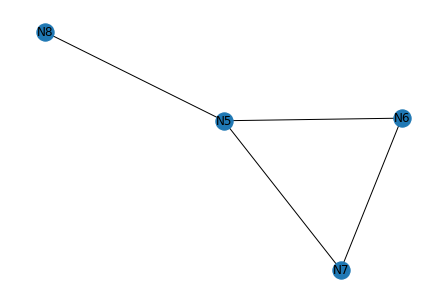

In [11]:
G_new = nx.to_undirected(G_directed)
nx.draw(G_new, with_labels=True)

<b>Example</b> Karate club network constructed by [Zachary (1977)](https://www.jstor.org/stable/3629752?seq=1#page_scan_tab_contents) is one of the famous examples in network analysis.

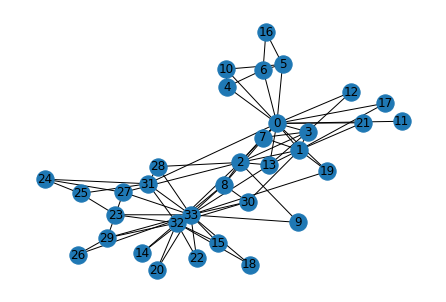

In [12]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

<b>Note:</b> Alternatively, you can use circular layout to have clearer presentation of the graph.

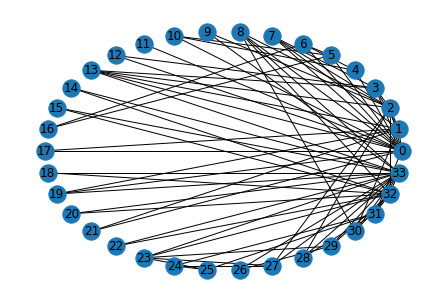

In [13]:
nx.draw_circular(G, with_labels=True)

<b>Note:</b> The nodes that are linked to another node are called the <b>neighbors</b> of a node. The number of neighbours is called the <b>degree</b> of a node. You can use <b style = 'color:blue'>neighbors( )</b> function to find neighbors of a node in graph.

In [14]:
nx.neighbors(G,4)

In [15]:
[n for n in nx.neighbors(G,4)]

[0, 6, 10]

<b>Note:</b> You can also use element level drawing to show the neighbor in color.

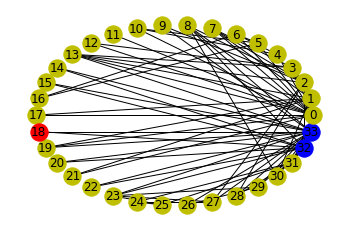

In [16]:
node_name = 18

pos = nx.circular_layout(G)
neighbors = [n for n in G.neighbors(node_name)]
non_neighbors = [n for n in nx.non_neighbors(G,node_name)]

nx.draw_networkx_nodes(G,pos,nodelist=neighbors, node_color = 'b')
nx.draw_networkx_nodes(G,pos,nodelist=non_neighbors, node_color = 'y')
nx.draw_networkx_nodes(G,pos,nodelist=[node_name], node_color = 'r')

nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.axis('off');

<b>Note:</b> You can use <b style='color:blue'>degree( )</b> function to see the degree of all the nodes in the graph.

In [17]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

<b>Note:</b> A better presentation is to use bar plot.

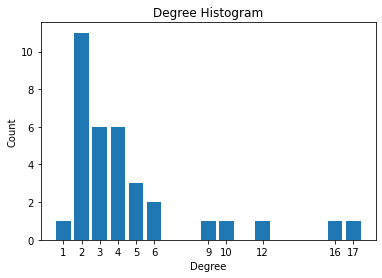

In [18]:
import collections
# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg);

### 1.1. Paths

One of the most basic operations on any network is finding a <b>path</b> from one node to another node, not unlike finding a route from one city to another using some navigational software.

<b>Note:</b> You can use <b style='color:blue'>shortest_path( )</b> function to find shortest path between two nodes.

In [19]:
edge_paths = nx.shortest_path(G, source=16, target=15)
edge_paths

[16, 5, 0, 2, 32, 15]

This retrieves a shortest path between node <b>16</b> and node <b>15</b>.

<b>Note:</b> You can use <b style='color:blue'>shortest_path_length( )</b> function to find the length of shortest path between two nodes.

In [20]:
path_length = nx.shortest_path_length(G,source=16, target=15)
path_length

5

<b>Note:</b> The largest distance from a node to any other node is called the **eccentricity**. If a node has a very high eccentricity, it is a bit peripheral. If a node has a very low eccentricity, it means that it is relatively close to to all other nodes, and that it is in the center of the graph in a certain sense. You can use <b style='color:blue'>eccentricity( )</b> function to retrieve these values.

In [21]:
eccentricity = nx.eccentricity(G)
eccentricity

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

**Note:** The minimum eccentricity is called the <b>radius</b> of the graph and the maximum eccentricity is called the <b>diameter</b>. <u>The diameter of any graph is always larger than the radius and smaller than twice the radius</u>. You can use <b style='color:blue'>diameter( )</b> and <b style='color:blue'>radius( )</b> to retrieve these values.

In [22]:
diameter = nx.diameter(G)
radius = nx.radius(G)
print("diameter is {} and radius is {}".format(diameter,radius))

diameter is 5 and radius is 3


The network we currently look at is connected, which is not necessarily the case. It can consist of multiple components. Let us delete a number of edges so that we get a network with two components.

In [23]:
G.remove_edge(0,4)
G.remove_edge(0,5)
G.remove_edge(0,6)
G.remove_edge(0,10)

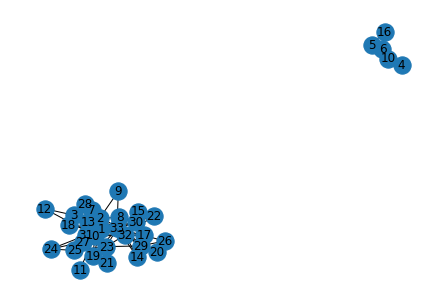

In [24]:
nx.draw(G, with_labels=True)

In this case, there is no longer any path between the two nodes at all. The distance between the two nodes in hence infinitely large.

In [25]:
edge_paths = nx.shortest_path(G, source=16, target=15)
edge_paths

NetworkXNoPath: No path between 16 and 15.

There is now no longer a path between any two nodes, and the graph is then no longer said to be **connected**.

In [26]:
nx.is_connected(G)

False

The network is now said to be disconnected and the different parts of the network that still are connected are called **connected components**.

In [27]:
components = nx.connected_components(G)
for i, com in enumerate(components):
    print('The component{} is:'.format(i))
    print(com)

The component0 is:
{0, 1, 2, 3, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}
The component1 is:
{4, 5, 6, 10, 16}


Usually, networks tend to have one large component, and many smaller components. In empirical networks, it is therefore common practice to restrict any further analyses to the largest connected component. Because the difference between the largest connected component and the other components is usually quite large, the largest connected component is sometimes also called the **giant component**.

### 1.2. Cycles

If there are two paths going from one node to another node, we can join them together and make a **cycle**. We start again with a fresh graph.

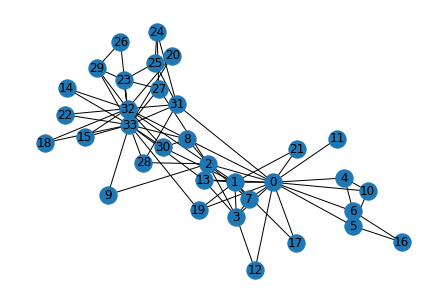

In [28]:
G = nx.karate_club_graph()
nx.draw_spring(G, with_labels=True)

<b>Note:</b> You can find cycles from a specific root using <b style='color:blue'>cycle_basis( )</b> function.

In [29]:
nx.cycle_basis(G,4)

[[0, 10, 4],
 [0, 5, 10],
 [6, 5, 10, 4],
 [6, 16, 5],
 [0, 6, 4],
 [8, 33, 31, 0],
 [13, 33, 31, 0],
 [19, 33, 31, 0],
 [28, 33, 31],
 [32, 33, 31],
 [32, 22, 33],
 [1, 30, 33, 31, 0],
 [8, 30, 33],
 [32, 30, 33],
 [23, 29, 33],
 [26, 29, 33],
 [32, 29, 33],
 [2, 27, 33, 31, 0],
 [23, 27, 33],
 [24, 27, 33, 31],
 [25, 23, 33, 31],
 [32, 23, 33],
 [32, 20, 33],
 [32, 18, 33],
 [32, 15, 33],
 [32, 14, 33],
 [2, 9, 33, 31, 0],
 [2, 32, 31, 0],
 [8, 32, 31, 0],
 [2, 28, 31, 0],
 [24, 25, 31],
 [1, 21, 0],
 [1, 19, 0],
 [1, 17, 0],
 [1, 13, 0],
 [2, 13, 0],
 [3, 13, 0],
 [3, 12, 0],
 [2, 8, 0],
 [1, 7, 0],
 [2, 7, 0],
 [3, 7, 0],
 [1, 3, 0],
 [2, 3, 0],
 [1, 2, 0]]

<b>Question:</b> Write a simple code to capture largest circles in the above detected circles.

In [30]:
# Write your code over here

The smallest cycle of length 3 are of particular interest to the social sciences. A small group of three people is commonly called a **triad** in the social sciences. It is of particular interest because if two people have a friend in common, they are more likely to become friends themselves. This is known as **triadic closure**.

<b>Note:</b> If there are many closed triads, i.e. many cycles of length 3, it suggests that many people have many friends in common. In particular, the network is then said to be **clustered**. The **clustering coefficient** for a node is defined as the proportion of neighbours that are connected amongst each other. A clustering coefficient of <b>1</b> then means that all the neighbours of a node are connected to each other, while a clustering coefficient of <b>0</b> means that no neigbhours are connected amongst each other. <u>The overall clustering is then simply the average over the whole network</u>.

<b>Note:</b> In order to capture the clustering coefficient for one user you can use <b style='color:blue'>clustering( )</b> function. 

In [31]:
clustering = nx.clustering(G)
clustering

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

<b>Note:</b> In order to capture the overall clustering of a graph, you can use <b style='color:blue'>average_clustering( )</b> function.  

In [32]:
avg_clustering = nx.average_clustering(G)
avg_clustering

0.5706384782076823

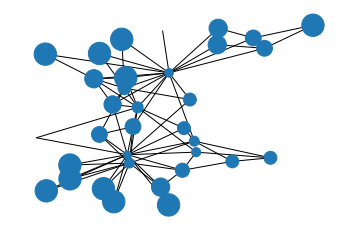

In [33]:
nodes = [key for key, value in nx.clustering(G).items()]
clustering = [value for key, value in nx.clustering(G).items()]
# node size based on clustering coefficient
node_sizes = [c*500 for c in clustering]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=nodes, node_size = node_sizes)
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.axis('off');

As you can see, the nodes that are more clustered seem to be more peripheral. This is something that can be seen more
often. Nodes that have many neighbours usually have fewer connections between *all* their neighbours, so that they tend to have a lower clustering coefficient.

Nodes that have a higher clustering coefficient tend to be well embedded in the network. Nodes with a low clustering coefficient on the other hand tend to function as bridges, connecting different parts of the network. For example, when removing node 0 from the network, this disconnects the network.

## 2. Social network analysis

### 2.1. Reciprocity

Perhaps one of the most fundamental aspect in many social networks is **reciprocity**, the tendency to do unto another what (s)he did to you. That is, the relationships between people have some tendency to be symmetric. This is surely not the case for all relationships, as there are for example some clear assymmetries between for example an employer and an employee or a soldier and a general. Nonetheless, in other cases, we may expect some reciprocity to hold.

<b>Note:</b> In networkx you can use <b style='color:blue'>reciprocity( )</b> function to find the the level of reciprocity in <u>directed networks</u>. 

In [34]:
G_directed = nx.to_directed(G)
nx.reciprocity(G_directed)

1.0

In our current case, the graph consists of two-way connections among all nodes, so the reciprocity equals 1.

### 2.2. Centrality

The main idea behind centrality is that more central persons are generally more influential. There are several variants of centrality, and all of them have some merit. We will illustrate them on the karate club network again.

In [35]:
G = nx.karate_club_graph()

#### Degree centrality

The simplest is degree centrality, which is the fraction of nodes that each node is connected to.

In [36]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

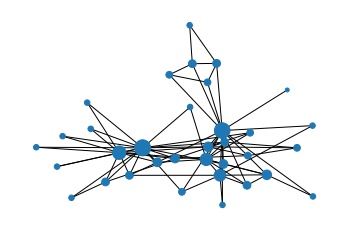

In [37]:
nodes = [key for key, value in degree_centrality.items()]
cen_value = [value for key, value in degree_centrality.items()]

node_sizes = [c*500 for c in cen_value]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=nodes, node_size = node_sizes)
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.axis('off');

#### Betweenness centrality

Betweenness centrality is the fraction of the shortest paths that goes through a certain node is called the betweenness centrality.

In [38]:
betweenness_centrality = nx.betweenness_centrality(G)

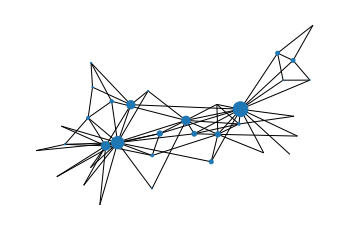

In [39]:
nodes = [key for key, value in betweenness_centrality.items()]
cen_value = [value for key, value in betweenness_centrality.items()]

node_sizes = [c*500 for c in cen_value]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=nodes, node_size = node_sizes)
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.axis('off');

#### Eigenvector centrality

The idea of eigenvector centrality is that you are as central as the people you are connected with.

In [40]:
eigenvector_centrality = nx.eigenvector_centrality(G)

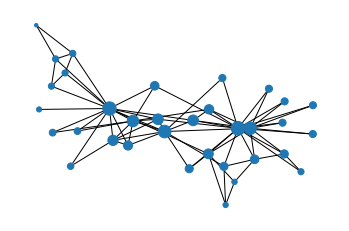

In [41]:
nodes = [key for key, value in eigenvector_centrality.items()]
cen_value = [value for key, value in eigenvector_centrality.items()]

node_sizes = [c*500 for c in cen_value]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=nodes, node_size = node_sizes)
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.axis('off');

#### Pagerank

One problem with eigenvector centrality is that it is not always well-defined in the case of directed graphs. The interesting thing of eigenvector centrality is that it is similar to the proportion of time spent in a node if a *random walker* would traverse the network, choosing links to follow at random. In directed graphs there may be so-called *sinks*: nodes with no outgoing edges. If you think of a random walker, you can imagine the problem: (s)he gets stuck in a sink. The opposite of *sinks* are called *sources*: nodes with no incoming edge. A random walker would then never arrive in a source.

To alleviate this problem, the idea of *teleportation* was introduced. With a small probability a random walker would start in any other node at random. Hence, from any sink node the walker can then always escape, and there is always a probability (s)he arrives at a source node. This was introduced by the founders of Google to model a *random surfer*, jumping from webpage to webpage and every now and then starting a new. This centrality measure is called pagerank, and it forms the core of Google's search engine.

In [42]:
pagerank = nx.pagerank(G)

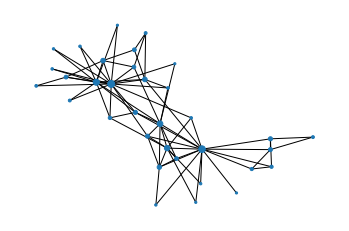

In [43]:
nodes = [key for key, value in pagerank.items()]
cen_value = [value for key, value in pagerank.items()]

node_sizes = [c*500 for c in cen_value]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=nodes, node_size = node_sizes)
#nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.axis('off');

### 2.3. Weak ties

There are two main ideas associated with the so-called strenght of weak ties (i.e. links of low weight). The first is that weak ties hold together the network. The second is that new information is obtained through weak ties. The first can be studied relatively easily on any given weighted network. The second is more difficult, and is less frequently studied, because it also requires observations on information sharing.

The idea that weak ties hold together the network can be studied in two contexts. One straightforward possibility is that if we cut weak ties we relatively quickly disconnect the network. Another possibility is that weak ties mostly fall between groups of people. Finally, it is often also analysed whether weak ties mostly fall between nodes that have relatively few common neighbors.

We will study this using the highschool network.

In [44]:
# Read edge list from csv file
net_data = pd.read_csv("Social_Network/social_net.csv")
# Read node attributes
nodes = pd.read_csv("Social_Network/nodes.csv")
# Convert pandas edgelist to graph
school_graph = nx.from_pandas_edgelist(net_data, 'Source', 'Target', create_using=nx.Graph())

Let's use ForceAtlas2 as the layout

In [92]:
# !pip install ForceAtlas2

In [93]:
# !pip install fa2

In [58]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=False,
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    
    jitterTolerance=1.0,
    barnesHutOptimize=True, 
    barnesHutTheta=1.2, 
    multiThreaded=False,
    
    scalingRatio=1.0, 
    strongGravityMode=True, 
    gravity=.5,
    
    # Log
    verbose=True)

In [59]:
pos = forceatlas2.forceatlas2_networkx_layout(school_graph, pos=None, iterations=1000)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1847.23it/s]

BarnesHut Approximation  took  0.16  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.03  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


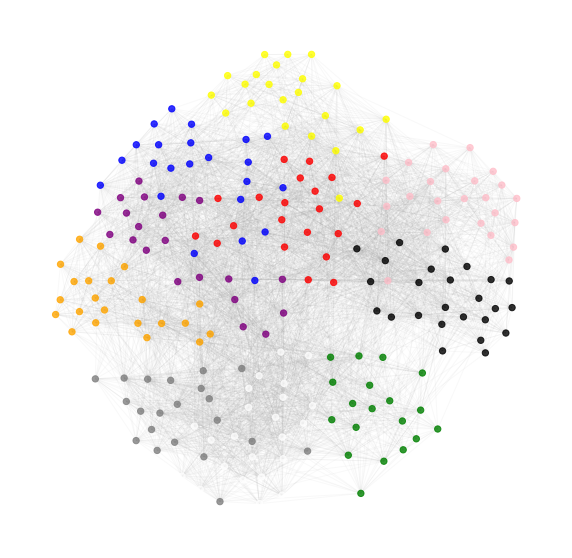

In [63]:
colors = {'1A':'red', '2A':'yellow', '3A':'blue', 
          '4A':'green','5A':'grey','1B':'black',
          '2B':'pink','3B':'purple','4B':'Orange',
          '5B':'white'}
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(school_graph, pos, 
                       nodelist=list(nodes.Id), node_size=40,  
                       node_color=nodes.Class.apply(lambda x: colors[x]), alpha=0.8)

nx.draw_networkx_edges(school_graph, pos, edge_color="gray", alpha=0.05)
# nx.draw_networkx_labels(school_graph, pos)

plt.axis('off');

<b>Note:</b> You can use <b style='color:blue'>edge_betweenness_centrality( )</b> to compute the centrality of edges.</b>

In [64]:
edge_centrality = nx.edge_betweenness_centrality(school_graph, normalized=True, weight=None)
edges = [key for key, value in edge_centrality.items()]
cen_value = [value for key, value in edge_centrality.items()]

Let's select the top 15 edges with highest betweenness centrality. 

In [65]:
top_edges = list()
top_edge_index = list(np.argsort(cen_value)[::-1][0:15])
for index in top_edge_index:
    top_edges.append(edges[index])

Now, we can Visualize the top 15 edges

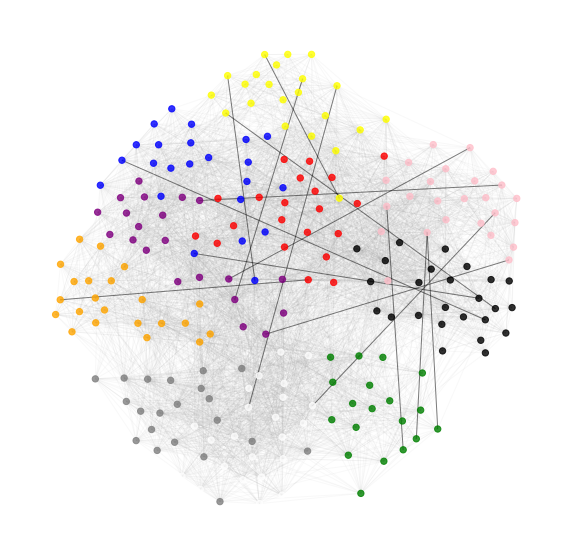

In [67]:
colors = {'1A':'red', '2A':'yellow', '3A':'blue', 
          '4A':'green','5A':'grey','1B':'black',
          '2B':'pink','3B':'purple','4B':'Orange',
         '5B':'white'}
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(school_graph, pos, 
                       nodelist=list(nodes.Id), node_size=40,  
                       node_color=nodes.Class.apply(lambda x: colors[x]), alpha=0.8)

nx.draw_networkx_edges(school_graph, pos, edgelist=edges, edge_color='gray', alpha=0.05)
nx.draw_networkx_edges(school_graph, pos, edgelist=top_edges, edge_color='black', alpha=0.5)
plt.axis('off');

## 3. Community detection

A common task in network analysis is **comunity detection**: finding groups of nodes that are relatively densely connected within communities, but sparsely between communities. It provides a sort of birds-eye view of the network, which helps in the interpretation of the network.

Modularity-based algorithm is one of the most popular methods for community detection. It compares a network with a random graph to detect dense communities that devaite from the random graph. Louvain algorithm can be used to maximaze the value of modularity and detect communities

Let's apply louvain algorithm to school network and detect communities

In [72]:
# import sys
# !conda install --yes --prefix "{sys.prefix}" python-louvain

In [73]:
net_data = pd.read_csv("Social_Network/social_net.csv")
school_graph = nx.from_pandas_edgelist(net_data, 'Source', 'Target', create_using=nx.Graph())

<b>Note:</b> You can use <b style='color:blue'>best_partition( )</b> function to apply louvain algorithm. 

In [84]:
from community import best_partition
partition = best_partition(school_graph)
partition

{1789: 0,
 1821: 1,
 1783: 0,
 1778: 0,
 1722: 4,
 1902: 0,
 1892: 1,
 1774: 0,
 1711: 0,
 1770: 0,
 1772: 0,
 1732: 3,
 1779: 3,
 1613: 0,
 1500: 2,
 1759: 0,
 1757: 0,
 1752: 0,
 1798: 0,
 1833: 4,
 1792: 0,
 1790: 0,
 1861: 3,
 1674: 3,
 1763: 4,
 1666: 3,
 1911: 0,
 1787: 0,
 1916: 0,
 1551: 4,
 1434: 2,
 1704: 3,
 1628: 0,
 1649: 0,
 1723: 4,
 1822: 4,
 1768: 0,
 1819: 1,
 1760: 0,
 1761: 0,
 1766: 0,
 1767: 0,
 1764: 0,
 1780: 4,
 1782: 4,
 1837: 2,
 1838: 4,
 1549: 2,
 1468: 2,
 1795: 4,
 1498: 2,
 1700: 4,
 1552: 4,
 1555: 4,
 1820: 4,
 1558: 4,
 1665: 3,
 1482: 2,
 1480: 2,
 1489: 2,
 1859: 4,
 1710: 3,
 1714: 4,
 1719: 4,
 1855: 3,
 1857: 1,
 1522: 2,
 1437: 2,
 1431: 2,
 1843: 4,
 1835: 1,
 1720: 4,
 1439: 2,
 1533: 2,
 1532: 2,
 1539: 2,
 1909: 4,
 1630: 1,
 1738: 4,
 1426: 2,
 1731: 4,
 1737: 4,
 1585: 2,
 1503: 2,
 1477: 2,
 1866: 1,
 1912: 3,
 1917: 0,
 1457: 2,
 1748: 4,
 1452: 2,
 1453: 2,
 1516: 2,
 1458: 2,
 1741: 4,
 1847: 1,
 1895: 1,
 1890: 3,
 1815: 2,
 1697: 3,


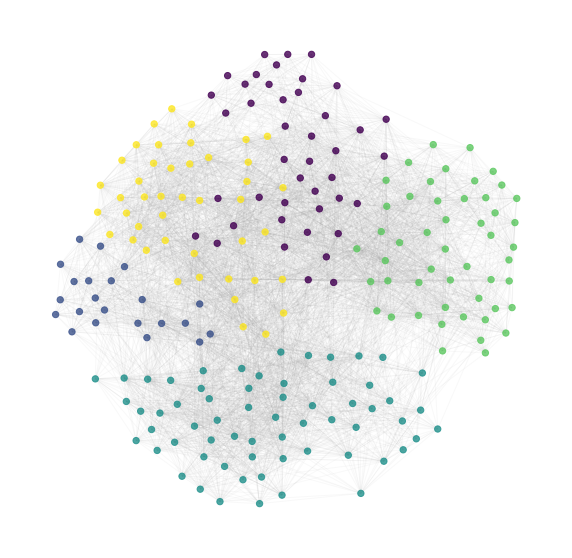

In [85]:
nodes = [key for key, value in partition.items()]
cluster = [value for key, value in partition.items()]


fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(school_graph, pos, 
                       nodelist=nodes, node_size=40,  
                       node_color=cluster, alpha=0.8)

nx.draw_networkx_edges(school_graph, pos, edge_color="gray", alpha=0.05)
plt.axis('off');

In [77]:
set(cluster)

{0, 1, 2, 3, 4}

As you can see the community detection method capured 5 different clusters in the graph.

<b>Note:</b> You can find the modularity value using <b style='color:blue'>modularity( )</b> function.

In [78]:
from community import modularity
mod = modularity(partition,school_graph)
mod

0.36701725495070014

<b>Note:</b> One of the main limitations of modularity-based algorithm is that it cannot detect small communities specially in large graphs. <b style='color:red'>resolution</b> parameter can help us to increase the number of detected communities within a graph by penalizing the objective function. resolution can be a float number between <b>0</b> and <b>1</b>. 

In [88]:
partition = best_partition(school_graph, resolution=.7)

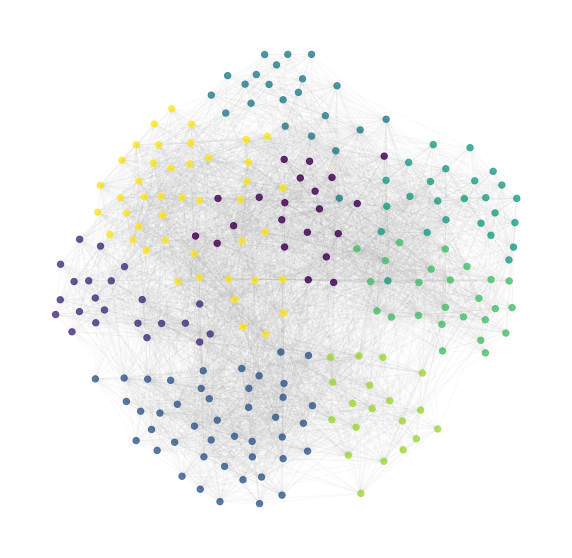

In [89]:
nodes = [key for key, value in partition.items()]
cluster = [value for key, value in partition.items()]

fig, ax = plt.subplots(figsize=(10, 10))
nx.draw_networkx_nodes(school_graph, pos, 
                       nodelist=nodes, node_size=40,  
                       node_color=cluster, alpha=0.8)

nx.draw_networkx_edges(school_graph, pos, edge_color="gray", alpha=0.05)
plt.axis('off');

In [90]:
set(cluster)

{0, 1, 2, 3, 4, 5, 6, 7}

<b>Excercise:</b> Compare the detected community graphs with class labeled graph 